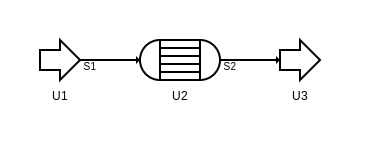

In [1]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger,Mixer, Splitter, SvgContext
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment
from IPython.core.display import SVG, HTML

pfd= Flowsheet("Demo","Simple Distillation", "Demo Flowsheet for showing different styling options")

U1=pfd.unit(StreamFlag("U1","Off-Page Connector", position=(00,100)))
U2=pfd.unit(Vessel("U2","Horizontal Vessel", position=(100,100), orientation="horizontal", size=(80,40),internals="tubes" ))
U3=pfd.unit(StreamFlag("U3","Off-Page Connector", position=(240,100)))

pfd.connect("S1", U1["Out"],U2["In"] )
pfd.connect("S2", U2["Out"],U3["In"] )


ctx= SvgContext("../img/styling_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))


## Stream Formatting

You can change the color of any stream with the lineColor attribute. The API expects a 4-tuple in RGBA format (Red-Green-Blue-Alpha). The alpha value is currently ignored.

You can display a stream with dashes by specifying the dashArray attribute. The API expects a string describing the pattern (4 units of line, 1 unit of void in this example.)

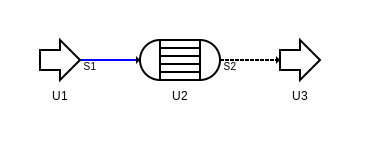

In [2]:
pfd.streams["S1"].lineColor=(0,0,255,255)
pfd.streams["S2"].dashArray="4 1"

ctx= SvgContext("../img/styling_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))

## Orientation and rotation
You can also rotate unit operation or flip them horizontally (or vertically). For rotation, the API expects the angle in degree. Please be aware that successive calls only set the rotation to the argument and do not increment.

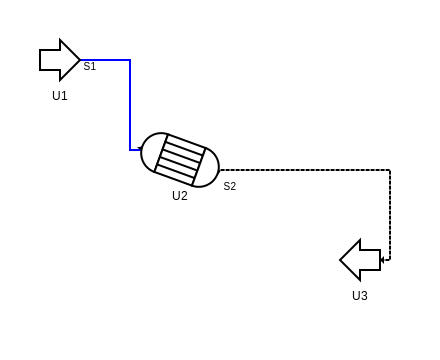

In [3]:
U1.position=(0,0)
U2.rotate(20)
U3.position=(300,200)
U3.flip(axis="horizontal")

ctx= SvgContext("../img/styling_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))

## Styling unit operations

You can also change the appearance of the unit operations by changing the lineColor and fillColor attributes. You can also change the position of the text label, as well as the font color and family.

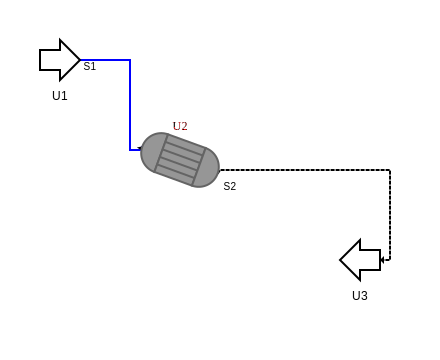

In [4]:
U2.fillColor=(150,150,150,255)
U2.lineColor=(100,100,100,255)

U2.setTextAnchor(HorizontalLabelAlignment.Center,VerticalLabelAlignment.Top,(0,-10) )
U2.fontFamily="Times New Roman"
U2.textColor = (255,0,0,255)

ctx= SvgContext("../img/styling_example.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))